In [1]:
%env CUDA_VISIBLE_DEVICES=7

env: CUDA_VISIBLE_DEVICES=7


In [2]:
import os
import torch
import sbibm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import pickle

sns.set_theme()

In [3]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

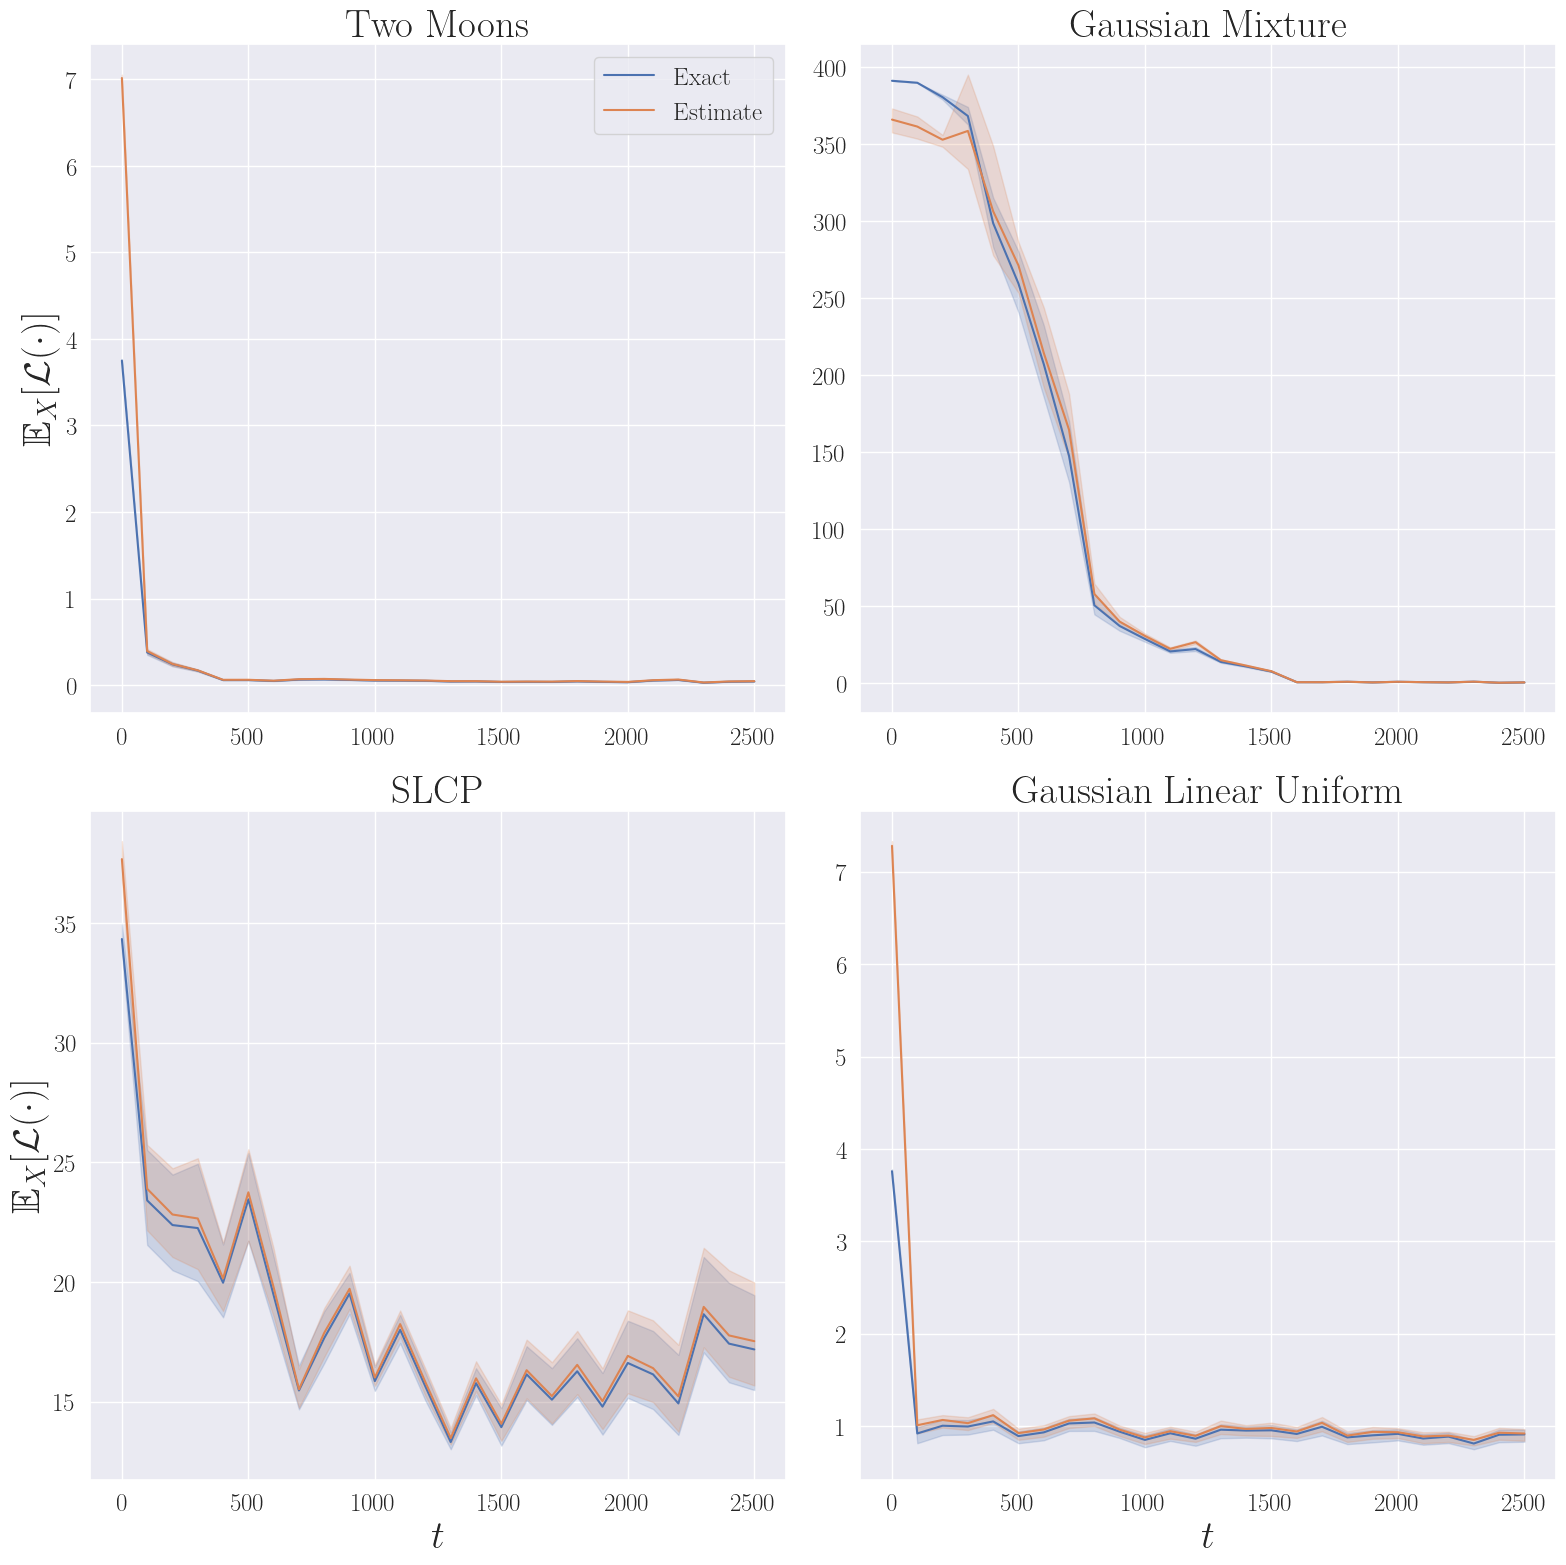

In [6]:
task_names = [
    'two_moons',
    'gaussian_mixture',
    'slcp',
    'gaussian_linear_uniform',
]

task_name_titles = [
    'Two Moons',
    'Gaussian Mixture',
    'SLCP',
    'Gaussian Linear Uniform',
]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,16))

for i, task_name in enumerate(task_names):
    ax = axs[i // 2, i - 2 * (i // 2)]
    ax.set_title(task_name_titles[i], fontsize=28)
    
    if i == 2 or i == 3:
        ax.set_xlabel(r"$t$",fontsize=28)
    else:
        ax.set_xlabel(" ")

    if i == 0 or i == 2:
        ax.set_ylabel(r"$\mathbb{E}_X[\mathcal{L}(\cdot)]$",fontsize=28)
    else:
        ax.set_ylabel(" ")
    
    df = pd.read_csv(f'{task_name}_sizes.csv', header=None, index_col=0, names=["N", "T", "Exact", "Estimate"])

    sns.lineplot(data=df, x="T", y="Exact", ax=ax, label="Exact", legend=(i==0))
    sns.lineplot(data=df, x="T", y="Estimate", ax=ax, label="Estimate", legend=(i==0))

plt.tight_layout()
plt.savefig(f"sbi_set_sizes.png")